In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cf


In [ ]:
#load data
data = pd.read_csv('../input/aviation-accident-database-synopses/AviationData.csv',  engine = 'python')
data.head(10)

In [ ]:
# no impute, visualize available data

#SOME IDEAS:
# event ID dupes remove
# accident number remove
# feature engineer event date
# feature engineer LOC (state?) (show map?)
# Lat Long
# injury severity pretty straightforward          
# format 'Make', some CESSNA, some Cessna*
# model related to format, check most frequent values
# drop sched 70k unknown
# drop air carrier 80k unkown
# search report status meaning

In [ ]:
#feature engineer 'Make'
#data['Make'].str.lower().capitalize()
data['Make'] = data['Make'].apply(lambda x: x.lower().capitalize() if type(x) == str else x)

In [ ]:
#feature engineer 'Injury.Severity', all fatal accidents into one feature regardless of count,  convert unavailable values to NaN
data['Injury.Severity']= data['Injury.Severity'].apply(lambda x: x[:5] if  '(' in x else x)
data['Injury.Severity'].loc[data['Injury.Severity'] == 'Unavailable'] = np.nan

In [ ]:
#internal relationship visualization ideas:

# -date (monthly/day  of week/yearly histogram) lineplot
# -location (definitely a heat map on a literal map of sorts/ country) lineplot
# -heatmap worldmap
# -heatmap available lat longs
# -histogram injury severity
# -histo aircraft damage
# -histo aircraft cat  available
# -histo make get top 10 
# -histo amateur built
# -histo number  of engines
# -histo engine type
# -histo  far desc
# -histo purpose
# -histo weather condition
# -histo broad phase of flight


#list of histograms
histo_features = ['Injury.Severity','Aircraft.Damage','Aircraft.Category', 'Make','Amateur.Built','Number.of.Engines','Engine.Type','FAR.Description','Purpose.of.Flight','Weather.Condition','Broad.Phase.of.Flight']
histo_obj =[x  for x in histo_features if data[x].dtypes == 'object']
histo_num =[x  for x in histo_features if data[x].dtypes != 'object']

In [ ]:
#histograms
fig  = plt.figure(figsize = (12,34))
for x in  histo_features:
    fig.add_subplot(6,2, histo_features.index(x)+1)
    if len(data[x].value_counts()) >10:
        sns.countplot(x = data[x].dropna(), 
                      data  =  data, 
                      order = data[x].value_counts()[0:9].index).set(xlabel= x, 
                                                                     ylabel = "Accident Count 1940 - 2020")
        plt.xticks(rotation=90)
    else:
        sns.countplot(x = data[x].dropna(), 
                      data  =  data).set(xlabel= x, 
                                         ylabel = "Accident Count 1940 - 2020")
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#create df of existing coordinates
coordinatesdf =  data[['Latitude', 'Longitude','Injury.Severity']]
coordinatesdf = coordinatesdf.dropna(axis = 0, 
                                     subset = ['Longitude','Latitude'])

In [ ]:
#lat long projection of aircraft  crash
'''fig = plt.figure(figsize =  (30,19))
ax = fig.add_subplot(1,1,1, 
                     projection = ccrs.PlateCarree())
ax.add_feature(cf.LAND)
ax.add_feature(cf.OCEAN)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS, linestyle=':')
ax.add_feature(cf.LAKES, alpha=0.5)
ax.add_feature(cf.RIVERS)
ax.set_title("Aircraft Accidents", fontsize =  50)
sns.scatterplot(x = 'Longitude', y  = 'Latitude', data= coordinatesdf,
                hue =  'Injury.Severity',
                alpha  =  0.5,
                marker  = 'o',
                s = 100,
                color ='red',
                transform=ccrs.PlateCarree())
plt.show()
'''

**The features arent downloading! Couldnt bother making it work XD. Feel free to try the code in your personal notebook! Here's an  image of the supposed output instead:**

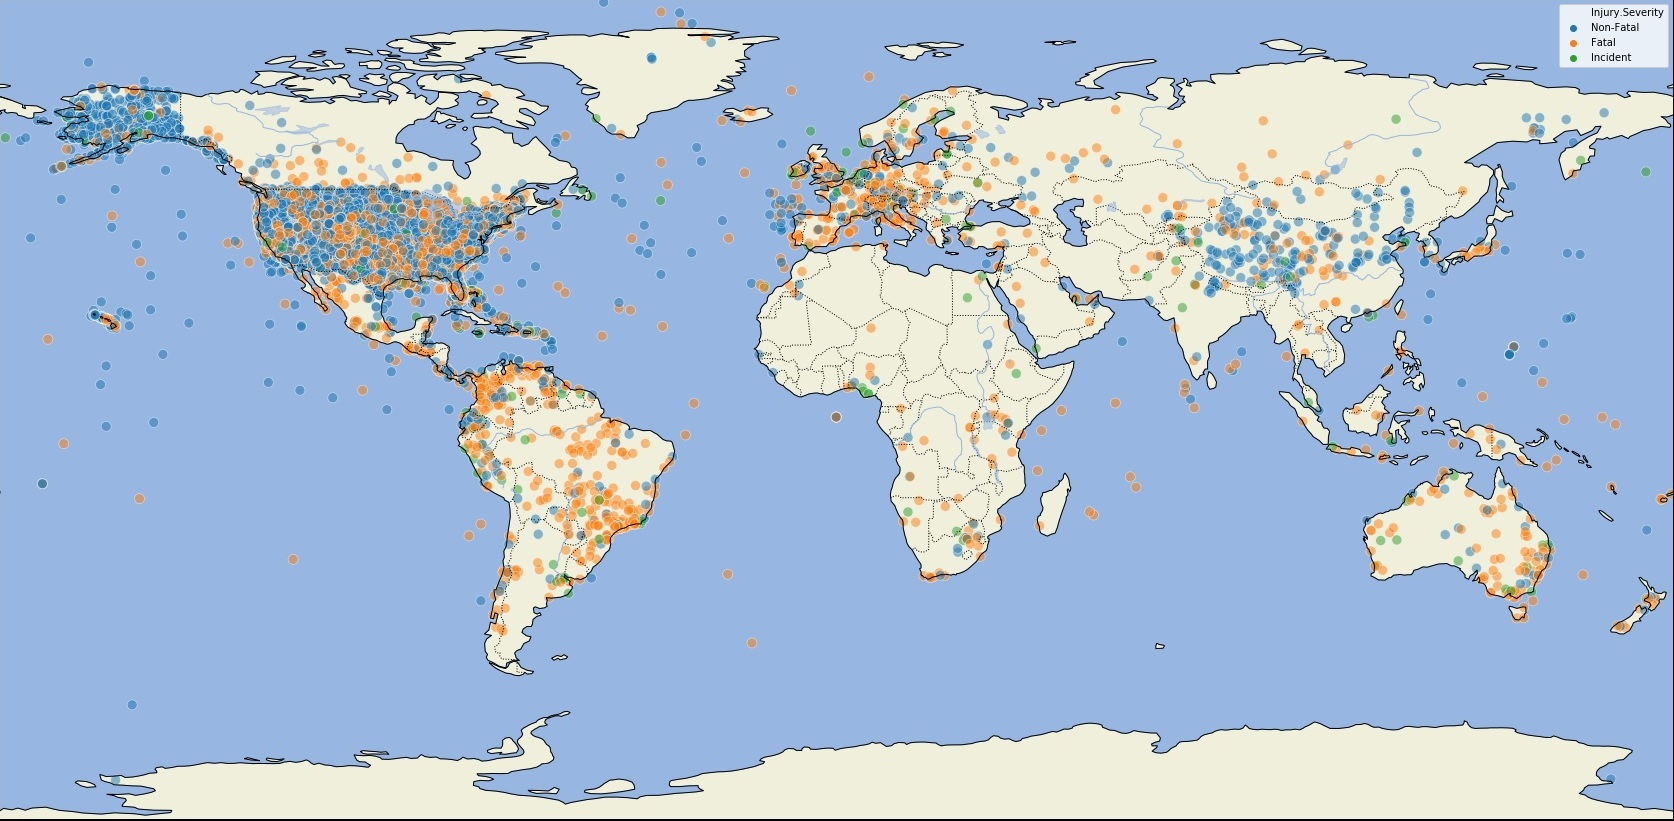

It's interesting to me how much over the water accidents are non fatal, but then again most of the accidents only  sustained substantial damage.
Unfortunately the dataset does not discuss the nature of each accident, would  be cool to  explore it.
Majority of the data is concentrated in the USA!

In [ ]:
#feature engineer Dates  for visualization
data['parsedate'] = pd.to_datetime(data['Event.Date'])
data['Day.Of.Week'] = data['parsedate'].dt.day_name()
data['Month.Name'] = data['parsedate'].dt.month_name()
data['year'] = data['Event.Date'].str[0:4].astype(int)

In [ ]:
#year histogram
sns.distplot(a =  data['year'], 
             bins  = 72,
             kde= True)
plt.xticks(rotation = 90)

Interesting downward trend as aviation evolves through time.

In [ ]:
fig = plt.figure(figsize = (18,7))




fig.add_subplot(1,2,1)
sns.countplot(x = 'Month.Name', 
              data = data, 
              order  =  ['January', 'February','March', 'April','May',  
                         'June','July', 'August', 'September', 'October','November','December']).set(xlabel= 'Month Name', 
                                                                                                     ylabel = "Accident Count 1940 - 2020")
plt.xticks(rotation = 90)

fig.add_subplot(1,2,2)
sns.countplot(x = 'Month.Name', 
              data = data,  
              order = data['Month.Name'].value_counts()[:].index).set(xlabel= 'Month Name (Greatest  to Least)', 
                                                                      ylabel = "Accident Count 1940 - 2020")
plt.xticks(rotation = 90)

1. The month with maximum accident occurence (July) is twice the month with minimum occurence (January).
2. Top 3 months and bottom 3 months are consecutive to each other. Seasonal pattern? 


In [ ]:
sns.countplot(x = 'Day.Of.Week', data = data, 
              order  =  ['Sunday', 'Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday']).set(xlabel = 'Day of Week',
                                                                                                        ylabel = 'Accident Count 1940 - 2020')
plt.xticks(rotation = 90)

Peaking at weekends but a rather normal  distribution.

In [ ]:
#relationship between features:

# -amateur built/broad phase of flight
# -aircraft damage/phase of flight (mirror bar graph?) modify yticks maybe*
# -weather condition/phase of flight (mirror bar graph?)*
# -(make/4 types of engine) count of accidents
# - injury severity(AVERAGE fatalities)/engine type bar graph

These are my preliminary ideas. I tried mirrored bar graphs as well but they didnt turn out to my liking. Kept it simple with just good ol' fashioned bars.

In [ ]:
# amateur built/broad phase of flight
fig = plt.figure(figsize = (18,7))
fig.add_subplot(1,2,1)
data[['Amateur.Built','Broad.Phase.of.Flight']]
sns.countplot(x = 'Broad.Phase.of.Flight', 
              hue  = 'Amateur.Built', 
              data =data[~data['Broad.Phase.of.Flight'].isin(['UNKNOWN', 'OTHER'])].dropna(subset = ['Broad.Phase.of.Flight'])).set(xlabel= 'Broad Phase of Flight', 
                                                                                                                                    ylabel = "Accident Count 1940 - 2020")
plt.legend(title='Amateur Built', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation  =  90)
fig.add_subplot(1,2,2)
sns.countplot(x = data['Amateur.Built'].dropna(), 
                      data  =  data, 
                      order = data['Amateur.Built'].value_counts()[0:9].index).set(xlabel= 'Amateur Built', 
                                                                                   ylabel = "Accident Count 1940 - 2020")

Interesting, but take note: correlation != causation. Obvious sample bias in here as most planes are not amateur built anymore.

In [ ]:
# aircraft damage/phase of flight
fig = plt.figure(figsize = (18,7))
fig.add_subplot(1,2,1)
sns.countplot(x = 'Broad.Phase.of.Flight', 
              hue  = 'Aircraft.Damage', 
              data =data[~data['Broad.Phase.of.Flight'].isin(['UNKNOWN', 'OTHER'])].dropna(subset = ['Broad.Phase.of.Flight'])).set(xlabel= 'Broad Phase of Flight', 
                                                                                                                                    ylabel = "Accident Count 1940 - 2020")
plt.xticks(rotation  =  90)
plt.legend(title='Aircraft Damage', loc='upper right', labels=['Substantial', 'Destroyed','Minor'])
fig.add_subplot(1,2,2)
sns.countplot(x = data['Aircraft.Damage'].dropna(), 
                      data  =  data, 
                      order = data['Aircraft.Damage'].value_counts()[0:9].index).set(xlabel= 'Aircraft Damage', 
                                                                                   ylabel = "Accident Count 1940 - 2020")



1. Landing is the mode, the most common occurence of accidents, mostly substantial damage.
2. Maneuvering and Cruising phases of flight has a *relatively* larger portion of destroyed damages than other phases of flight.

In [ ]:
# weather condition/phase of flight (mirror bar graph?)
fig = plt.figure(figsize = (18,7))
fig.add_subplot(1,2,1)
sns.countplot(x = 'Broad.Phase.of.Flight', 
              hue  = 'Weather.Condition', 
              data =data[~data['Broad.Phase.of.Flight'].isin(['UNKNOWN', 'OTHER'])].dropna(subset = ['Broad.Phase.of.Flight'])).set(xlabel= 'Broad Phase of Flight', 
                                                                                                                                    ylabel = "Accident Count 1940 - 2020") 
plt.xticks(rotation  =  90)
plt.legend(title='Weather Condition')
fig.add_subplot(1,2,2)
sns.countplot(x = data['Weather.Condition'].dropna(), 
                      data  =  data, 
                      order = data['Weather.Condition'].value_counts()[0:9].index).set(xlabel= 'Weather Condition', 
                                                                                       ylabel = "Accident Count 1940 - 2020")

Majority of our data has an accident occuring at VMC (Visual Meteorological Conditions) which is weird, considering VMC means the weather is good enough for visual flight rules (without using instruments).

Lets check out a violinplot of VMC and IMC weather conditions vs year with Injury Severity as Hue to inspect if:
1. Weather conditions accident is related to year of occurence.
2. If Fatal/Non fatal accident counts fluctuate depending on weather conditions and year.

In [ ]:
sns.violinplot(x = 'Weather.Condition', 
               y = 'year',
               hue = 'Injury.Severity',
               split  =  True,
               data = data[data['Injury.Severity'] != 'Incident'].dropna(subset  = ['Weather.Condition','year','Injury.Severity'], axis = 0))

1. For our question 1, we can see a decrease in accident occurence  as  time goes by, evident in our previous histogram as well.
2. Fatal/ Non Fatal occurences are almost mirrored, although the non fatal incidents in IMC conditions are noticeably thinner than the fatal incidents.
3. We can also notice a more prominent dip in the number of accidents for IMC weather conditions, I assume, because only Instrument Rated Aircraft are allowed to take on IMC weather.

In [ ]:
# (make/4 types of engine) count of accidents
fig = plt.figure(figsize = (18,7))

fig.add_subplot(1,2,1)
sns.countplot(x = 'Make', 
              data  =  data.dropna(subset = ['Number.of.Engines']), 
              hue = 'Number.of.Engines',
              order = data['Make'].value_counts()[0:9].index)
plt.xticks(rotation  =  90)
plt.xlabel('Make')
plt.ylabel("Accident Count 1940 - 2020")
plt.legend(title='Number of Engines',   loc = 'upper right')

fig.add_subplot(1,2,2)
sns.distplot(a = data['Number.of.Engines'].dropna(), kde=False).set(ylabel = "Accident Count 1940 - 2020")

Cessna single engine planes (usually Reciprocating engines, and 1-4 seater) are responsible for 30% of all the accidents

In [ ]:
# number of engines/ engine  type
violindf = data[data['Engine.Type'].isin(['Reciprocating','Turbo Prop', 'Turbo Shaft', 'Turbo Fan','Turbo Jet'])]

fig = plt.figure(figsize = (20,20))

fig.add_subplot(2,1,1)
sns.countplot(x = 'Engine.Type', 
              data  =  data.dropna(subset = ['Number.of.Engines']), 
              hue = 'Number.of.Engines')
plt.xticks(rotation  =  90)
plt.xlabel('Engine Type')
plt.ylabel('Accident Count 1940 - 2020')
plt.legend(title='Number of Engines',   loc = 'upper right')

fig.add_subplot(2,1,2)
sns.countplot(x = 'Engine.Type',
              hue = data['Aircraft.Category'].apply(lambda x: x if x in ['Airplane', 'Helicopter', 'Glider'] else np.nan), #for simplicity
              data  =  data.dropna(subset = ['Aircraft.Category']))
plt.xticks(rotation  =  90)
plt.xlabel('Engine Type')
plt.ylabel('Accident Count 1940 - 2020')
plt.legend(title='Aircraft Category',   loc = 'upper right')

In [ ]:
# injury severity(Total.Fatal.Injuries)/engine type violin plot
# For engine type, I will be using the 5 main types of engine as it is  more  convenient, and it makes up 77 921 (97.4%) of non-null data.

violindf = data[data['Engine.Type'].isin(['Reciprocating','Turbo Prop', 'Turbo Shaft', 'Turbo Fan','Turbo Jet'])]
fig = plt.figure(figsize = (20,12))
fig.add_subplot(1,2,2)
sns.violinplot(x = 'Engine.Type', 
               y = 'Total.Fatal.Injuries',
               data = violindf)
plt.grid(b =True,  axis  = 'y',   linewidth = 1)
fig.add_subplot(1,2,1)
sns.regplot(x = 'Number.of.Engines', 
               y = 'Total.Fatal.Injuries',
               data = violindf)

I wish we had a number of seats feature or some sort to show the correlation of population and total fatal  injuries.
Alas, we'll  make do with fatal  injuries - number  of engines. Surprisingly low correlation given that more engines is usually supplied to larger aircraft.

1. The scatterplot pinpoints the outliers more clearly than the violinplot.  Although we can see the distribution more clearly at the latter.
2. Reciprocating engines are usually small planes  (cessnas)  with 1 engine, which might cause smaller fatalities.
3. Turboprops are usually on medium sized carriers (20-80 people) with mostly 2 engines as seen from the histogram above.
4. Turboshafts usually  have a single engine as most  turboshafts are helicopters as seen from the histogram above.
5. Most turbofan and turbojets have 2 or more engines, and are used in the airline industry. More passengers = more injuries.
6. The outlier values for double and quadruple engines are very high! These planes commonly has a lot of passengers, which might cause the high outlier values.

Will add more visualizations of ideas I come up with! Thank you for reading